In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_wecode = pd.read_csv("/content/drive/MyDrive/diem thi/wecode.csv")

In [ ]:
file_wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [ ]:
file_wecode2 = file_wecode[['user_id', 'assignment_id', 'problem_id', 'pre_score', 'is_final']]

def Solved(file_wecode2):
  if (file_wecode2['is_final'] == 1) and (file_wecode2['pre_score'] == 10000):
    return 1
  else:
    return 0

file_wecode2['solved'] = file_wecode2.apply(Solved, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
file_wecode2

,user_id,assignment_id,problem_id,pre_score,is_final,solved
0,4,0,3,10000,1,1
1,4,0,4,10000,1,1
2,4,0,5,0,0,0
3,4,0,5,0,0,0
4,4,0,5,0,0,0
...,...,...,...,...,...,...
264601,1796,0,25,0,0,0
264602,1796,0,25,0,0,0
264603,1796,0,25,10000,1,1
264604,255,0,150,6250,1,0


In [ ]:
grouped_by = file_wecode2.groupby(["user_id"])

n1 = grouped_by['assignment_id'].nunique() # Số assignment đã làm

n2 = grouped_by['problem_id'].nunique() # Số problem đã làm

n3 = grouped_by['problem_id'].count() # Số lần submit

temp1 = file_wecode2[file_wecode2['solved']==1][['user_id', 'solved']] # Số problem đã solve
temp1 = temp1.groupby('user_id').sum() 

temp2 = file_wecode2[file_wecode2['pre_score']==10000][['user_id', 'pre_score']] # Số điểm pre_score (%đúng ab,cd*100%)
temp2 = temp2.groupby('user_id').count()

temp3 = file_wecode2[file_wecode2['is_final'] == 1][['user_id', 'pre_score']] # Tổng pre_score is_final = 1
temp3 = temp3.groupby('user_id').sum()

In [ ]:
col={}
data_wecode = pd.DataFrame(col)

data_wecode['assigns'] = n1
data_wecode['probs'] = n2
data_wecode['solved'] = temp1['solved']
data_wecode['subs'] = n3
data_wecode['pre_score'] = temp2['pre_score']
data_wecode['WECODE_score'] = temp3['pre_score']

data_wecode.reset_index(inplace=True)

data_wecode.dropna(axis=0, inplace=True)

num_assignments = file_wecode2['assignment_id'].nunique()
num_problems = file_wecode2['problem_id'].nunique()
num_submissions = len(file_wecode2)

data_wecode['% assigns/all'] = data_wecode['assigns'] / num_assignments
data_wecode['% probs/all'] = data_wecode['probs'] / num_problems
data_wecode['% solved/all'] = data_wecode['solved'] / num_problems
data_wecode['% subs/all'] = data_wecode['subs'] / num_submissions
data_wecode['% solved/probs'] = data_wecode['solved'] / data_wecode['probs']
data_wecode['% pre_score/subs'] = data_wecode['pre_score'] / data_wecode['subs']

print('Number of Assigments:', num_assignments)
print('Number of Problems:', num_problems)
print('Number of Submissions:', num_submissions)

Number of Assigments: 290
Number of Problems: 634
Number of Submissions: 264606


In [ ]:
data_wecode

,user_id,assigns,probs,solved,subs,pre_score,WECODE_score,% assigns/all,% probs/all,% solved/all,% subs/all,% solved/probs,% pre_score/subs
0,1,1,2,1.0,2,1.0,10000.0,0.003448,0.003155,0.001577,0.000008,0.500000,0.500000
1,4,1,41,37.0,54,44.0,370000.0,0.003448,0.064669,0.058360,0.000204,0.902439,0.814815
2,5,4,5,3.0,6,3.0,30000.0,0.013793,0.007886,0.004732,0.000023,0.600000,0.500000
3,6,4,88,85.0,130,89.0,850000.0,0.013793,0.138801,0.134069,0.000491,0.965909,0.684615
5,11,10,18,9.0,50,19.0,100316.0,0.034483,0.028391,0.014196,0.000189,0.500000,0.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1860,10,43,28.0,76,29.0,329665.0,0.034483,0.067823,0.044164,0.000287,0.651163,0.381579
1155,1862,2,6,4.0,12,4.0,40000.0,0.006897,0.009464,0.006309,0.000045,0.666667,0.333333
1156,1864,5,63,28.0,187,30.0,439741.0,0.017241,0.099369,0.044164,0.000707,0.444444,0.160428
1157,1865,3,17,10.0,99,10.0,116428.0,0.010345,0.026814,0.015773,0.000374,0.588235,0.101010


In [ ]:
file_score = pd.read_csv("/content/drive/MyDrive/diem thi/score_training.csv")

In [ ]:
file_score

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


In [ ]:
data_score = file_score[['id', 'CK']]
data_score['CK'] = data_score['CK'].apply(pd.to_numeric, errors='coerce')
data_score = data_score.rename(columns={'id':'user_id', 'CK':'Term-end_Score'})
data_score = data_score.dropna(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_score

,user_id,Term-end_Score
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
...,...,...
970,1857,4.0
971,1859,1.5
972,1862,7.5
973,1865,7.5


In [ ]:
data = pd.merge(data_wecode, data_score, on='user_id', how='inner')

In [ ]:
data

,user_id,assigns,probs,solved,subs,pre_score,WECODE_score,% assigns/all,% probs/all,% solved/all,% subs/all,% solved/probs,% pre_score/subs,Term-end_Score
0,24,15,78,72.0,164,80.0,750299.0,0.051724,0.123028,0.113565,0.000620,0.923077,0.487805,9.5
1,27,2,5,3.0,13,4.0,39000.0,0.006897,0.007886,0.004732,0.000049,0.600000,0.307692,10.0
2,29,13,80,72.0,199,75.0,762760.0,0.044828,0.126183,0.113565,0.000752,0.900000,0.376884,8.5
3,34,11,84,81.0,218,81.0,822888.0,0.037931,0.132492,0.127760,0.000824,0.964286,0.371560,6.5
4,35,25,147,145.0,297,152.0,1477000.0,0.086207,0.231861,0.228707,0.001122,0.986395,0.511785,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,1856,5,31,23.0,64,23.0,270790.0,0.017241,0.048896,0.036278,0.000242,0.741935,0.359375,7.5
791,1857,6,34,37.0,55,37.0,386000.0,0.020690,0.053628,0.058360,0.000208,1.088235,0.672727,4.0
792,1859,7,27,3.0,31,3.0,39000.0,0.024138,0.042587,0.004732,0.000117,0.111111,0.096774,1.5
793,1862,2,6,4.0,12,4.0,40000.0,0.006897,0.009464,0.006309,0.000045,0.666667,0.333333,7.5


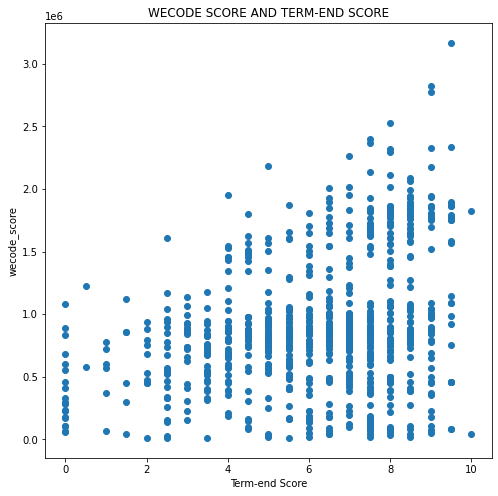

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize = (8, 8))

ax1.scatter(y = data['WECODE_score'], x = data['Term-end_Score'])
ax1.set_title("WECODE SCORE AND TERM-END SCORE")
ax1.set(ylabel='wecode_score', xlabel='Term-end Score')

plt.show()

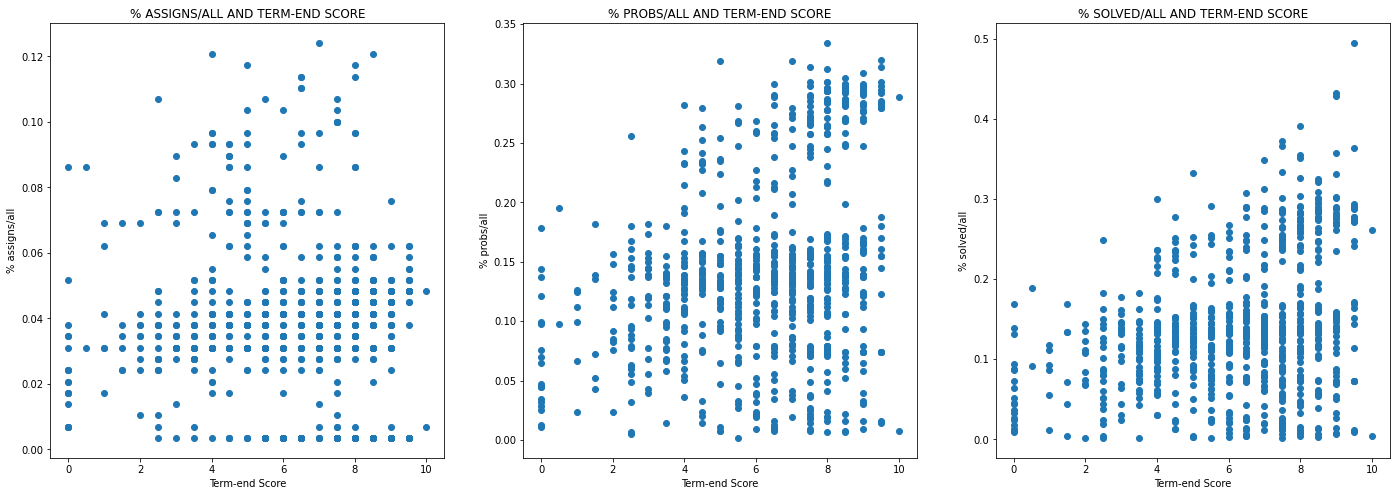

In [ ]:
_, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize = (24, 8))

ax2.scatter(y = data['% assigns/all'], x = data['Term-end_Score'])
ax2.set_title("% ASSIGNS/ALL AND TERM-END SCORE")
ax2.set(ylabel='% assigns/all', xlabel='Term-end Score')

ax3.scatter(y = data['% probs/all'], x = data['Term-end_Score'])
ax3.set_title("% PROBS/ALL AND TERM-END SCORE")
ax3.set(ylabel='% probs/all', xlabel='Term-end Score')

ax4.scatter(y = data['% solved/all'], x = data['Term-end_Score'])
ax4.set_title("% SOLVED/ALL AND TERM-END SCORE")
ax4.set(ylabel='% solved/all', xlabel='Term-end Score')

plt.show()

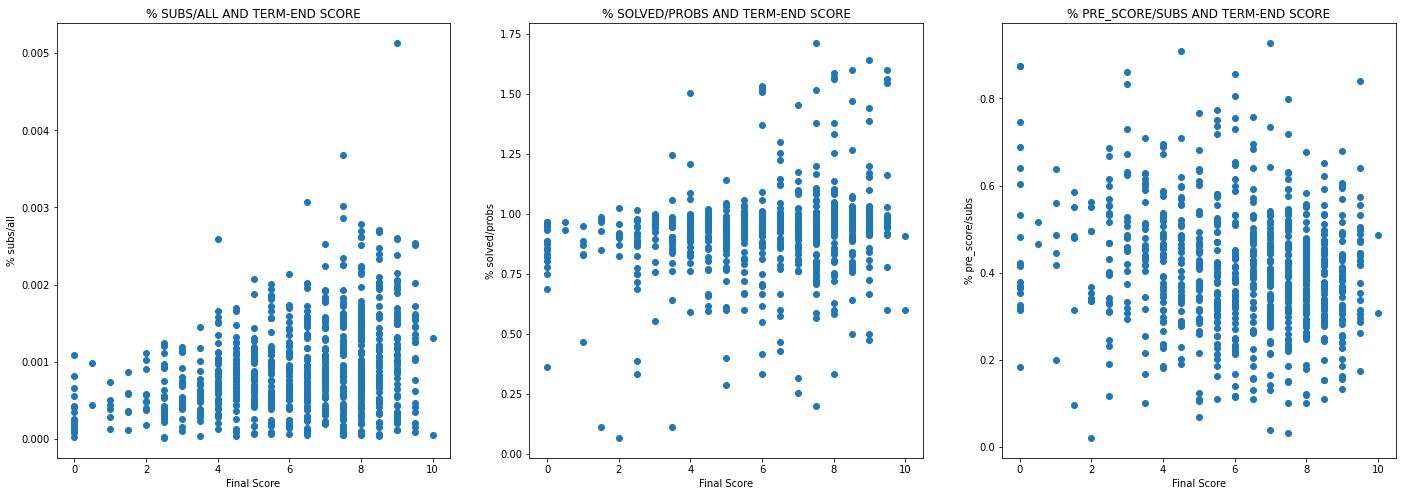

In [ ]:
_, (ax5, ax6, ax7) = plt.subplots(1, 3, figsize = (24, 8))

ax5.scatter(y = data['% subs/all'], x = data['Term-end_Score'])
ax5.set_title("% SUBS/ALL AND TERM-END SCORE")
ax5.set(ylabel='% subs/all', xlabel='Final Score')

ax6.scatter(y = data['% solved/probs'], x = data['Term-end_Score'])
ax6.set_title("% SOLVED/PROBS AND TERM-END SCORE")
ax6.set(ylabel='% solved/probs', xlabel='Final Score')

ax7.scatter(y = data['% pre_score/subs'], x = data['Term-end_Score'])
ax7.set_title("% PRE_SCORE/SUBS AND TERM-END SCORE")
ax7.set(ylabel='% pre_score/subs', xlabel='Final Score')

plt.show()